In [158]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Math
import matplotlib.gridspec as gridspec
import time
import scipy.stats as st

In [159]:
# Modelo lineal
def straight_line(x, m, c):
    ''' A straight line model: y = m*x + c '''
    return m*x + c

In [160]:
m_true = 3.5 # gradient of the line
c_true = 1.2 # y-intercept of the line

In [161]:
L = 1. #Range of x-data
M = 100 # Number of data points
x = np.sort(L * np.random.rand(M)) # their x-coordinates

In [162]:
sigma = 0.5 # standard deviation of the noise
data = straight_line(x, m_true, c_true) + sigma * np.random.randn(M)


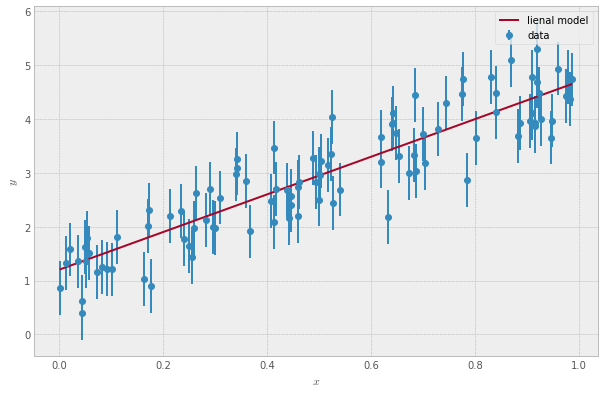

In [163]:
plt.figure(figsize=(9,6))
plt.errorbar(x, data, yerr=sigma, fmt="o", label='data')
plt.plot(x, straight_line(x, m_true, c_true), '-', lw=2, label='lienal model')
plt.legend()
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.show()

In [164]:
def logprior(theta,cmin,cmax,mmin,mmax,):
    ''' The natural logarithm of the prior probability. '''
    lp = 0.
    # unpack the model parameters from the tuple
    print(theta)
    m, c = theta

    # uniform prior on c
    

    cmin = -10. # lower range of prior
    cmax = 10.  # upper range of prior
    # set prior to 1 (log prior to 0) if in the range and zero (-inf) outside the range
    lp = 0. if cmin < c < cmax else -np.inf
    
     # uniform prior on m
    mmin = -15. # lower range of prior
    mmax = 15.  # upper range of prior
  
    # set prior to 1 (log prior to 0) if in the range and zero (-inf) outside the range
    lp += 0. if mmin < m < mmax else -np.inf
    
    return lp

In [165]:
def loglike(theta, data, sigma, x):
    '''The natural logarithm of the likelihood.'''
    # unpack the model parameters
    
    c,m = theta
    # evaluate the model
    lin_md = straight_line(x, m, c)
    # return the log likelihood
    return -0.5 * np.sum(((lin_md - data)/sigma)**2)


In [166]:
def logpost(theta, data, sigma, x,cmin,cmax,mmin,mmax,):
    '''The natural logarithm of the posterior.'''
    return logprior(theta,cmin,cmax,mmin,mmax,) + loglike(theta, data, sigma, x)

In [167]:
nwalkers = 10 # Number of walkers to use. It should be at least twice the number of dimensions.
nsteps = 5000 # Number of steps/iterations.
start = 0.01 * np.random.randn(nwalkers,2) # Initial positions of the walkers.
t0 = time.time()
samples = 0.01 * np.random.randn(len(x),2)


In [195]:
def guassian_posterior(X, theta):
    # returns the unnormalized log posterior
    loglik = loglike(theta, X, sigma, x)
    logprior = np.log(st.norm(loc=0, scale=1).pdf(theta))
    
    return loglik + logprior
    
def guassian_proposal(theta_curr):
    # proposal based on Gaussian
    theta_new = st.norm(loc=theta_curr, scale=0.2).rvs()
    return theta_new

def guassian_proposal_prob(x1, x2):
    # calculate proposal probability q(x2|x1), based on Gaussian
    q = st.norm(loc=x1, scale=1).pdf(x2)
    return q

def mcmc_mh_posterior(X, theta_init,sigma,x,nwalkers, cmin,cmax,mmin,mmax,func, proposal_func, proposal_func_prob, n_iter=1000):
    # Metropolis-Hastings to estimate posterior
    chains = []
    for j in range(nwalkers):
        thetas = []
        theta_curr = theta_init[j]
        accept_rates = []
        accept_cum = 0
        
        for i in range(1, n_iter+1):
            print(i)
            theta_new = proposal_func(theta_curr)

            prob_curr = func(theta_curr,X,sigma,x,cmin,cmax,mmin,mmax,)
            
            prob_new = func(theta_new,X,sigma,x,cmin,cmax,mmin,mmax,)
            
            # we calculate the prob=exp(x) only when prob<1 so the exp(x) will not overflow for large x
            print('probCur',prob_curr)
            print('prob_new',prob_new)
            if prob_new > prob_curr:
                acceptance_ratio = 1,1
            else:
                qr = proposal_func_prob(theta_curr, theta_new)/proposal_func_prob(theta_curr, theta_new)
                
                acceptance_ratio = np.exp(prob_new - prob_curr) * qr
            print('accRatio1',acceptance_ratio)
            acceptance_prob = min(1, acceptance_ratio[0]),min(1, acceptance_ratio[1])
            
            if acceptance_prob[0] > st.uniform(0,1).rvs() and acceptance_prob[1] > st.uniform(0,1).rvs():
                theta_curr = theta_new
                accept_cum = accept_cum+1
                thetas.append(theta_new)
            else:
                thetas.append(theta_curr)
                
            accept_rates.append(accept_cum/i)
        chains.append(thetas)
        
    return chains, accept_rates


# generate observed data
X = data
nwalkers = 10
ndim = 2
cmin = .5
cmax = 1.5
mmin = 2
mmax = 5
initSamples = [ np.random.randn(nwalkers,2)]

# run MCMC
thetas, accept_rates = mcmc_mh_posterior(X, initSamples[0],sigma,x, nwalkers,cmin,cmax,mmin,mmax,
                                         logpost, guassian_proposal, guassian_proposal_prob, 
                                         n_iter=1000)


1
[-0.13888545  1.88380494]
[-0.47303273  1.83388581]
probCur -1006.3121657517405
prob_new -1341.8822229934233
accRatio1 [1.8355907e-146 1.8355907e-146]
2
[-0.13888545  1.88380494]
[-0.5854401   1.62313549]
probCur -1006.3121657517405
prob_new -1584.2644454952472
accRatio1 [9.96584444e-252 9.96584444e-252]
3
[-0.13888545  1.88380494]
[-0.20382672  1.80124322]
probCur -1006.3121657517405
prob_new -1104.8915138945179
accRatio1 [1.5400438e-43 1.5400438e-43]
4
[-0.13888545  1.88380494]
[-0.08876627  1.55956206]
probCur -1006.3121657517405
prob_new -1128.217431190368
accRatio1 [1.14081679e-53 1.14081679e-53]
5
[-0.13888545  1.88380494]
[-0.42643087  1.64897087]
probCur -1006.3121657517405
prob_new -1401.6864100491896
accRatio1 [1.95500294e-172 1.95500294e-172]
6
[-0.13888545  1.88380494]
[-0.17886423  2.11069358]
probCur -1006.3121657517405
prob_new -930.407164476276
accRatio1 (1, 1)
7
[-0.17886423  2.11069358]
[-0.37270712  2.21589853]
probCur -930.407164476276
prob_new -1044.5295208051123

In [203]:
m_theta = []
c_theta = []
chains = []
for i in range(nwalkers):
    m_theta = []
    c_theta = []
    for j in range(len(thetas[0])):
        c_theta.append(thetas[i][j][0])
        m_theta.append(thetas[i][j][1])
    chains.append([c_theta,m_theta]) 

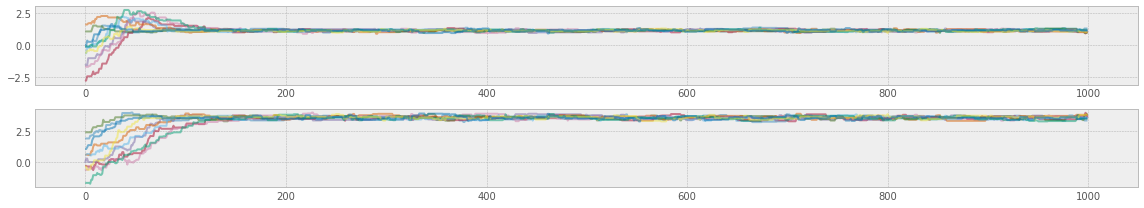

In [204]:


plt.figure(figsize=(16,1.5*ndim))

for n in range(ndim):
    plt.subplot2grid((ndim, 1), (n, 0))
    for i in range(nwalkers):
        plt.plot(chains[i][n][:], '-',alpha=0.5)
plt.tight_layout()
plt.show()

In [214]:
import seaborn as sns
import pandas
m = []
c = []
for i in range(len(chains[0][0])):
    meanM = []
    meanC = []
    for j in range(nwalkers):
        meanM.append(chains[j][1][i])
        meanC.append(chains[j][0][i])
    m.append(np.mean(meanM))
    c.append(np.mean(meanC))
m_fit = max(m)
c_fit = max(c) 
print(m_fit)

d = {'c': c, 'm': m}
c_fit = max(d['c']) 
print([x.tolist().index(c_fit)])
chainData = pandas.DataFrame(d)


3.6774389396812035


ValueError: 1.650196782574207 is not in list

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


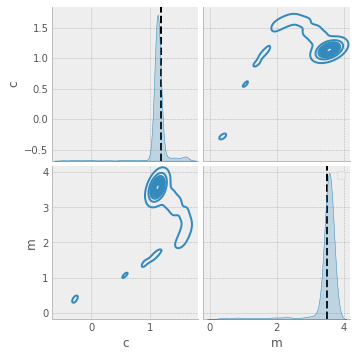

In [199]:
#sns.pairplot(chainData, kind="kde")
plt.style.use('bmh')
g = sns.pairplot(chainData, kind="kde")
i = 0
for ax in g.axes.ravel():
    if i == 0: ax.axvline(x=c_true, ls='--', linewidth=2, c='black',label='True c')
    if i == 3: ax.axvline(x=m_true, ls='--', linewidth=2, c='black',label='True m')
    i += 1
plt.show()


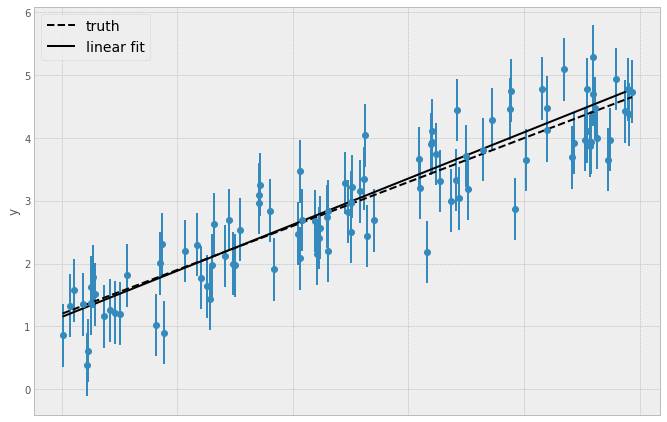

In [215]:
###
fig,ax1=plt.subplots(1,1,figsize=(10,7))
gs=gridspec.GridSpec(1,1)
colors=['b','orange']
###
ax1=plt.subplot(gs[0])
# inds = np.random.randint(len(chains[:][1]), size=100)
# for ind in inds:
#     sample = chains[ind]
#     ax1.plot(x, np.dot(np.vander(x, 2), sample[:2]),colors[0], alpha=0.1)

ax1.errorbar(x, data, yerr=sigma, fmt="o")
ax1.plot(x, straight_line(x,m_true,c_true), 'k--', label="truth")
ax1.plot(x, straight_line(x,m_fit,c_fit-cmin), 'k', label="linear fit")


###

ax1.legend(fontsize=14)
models = ['linear model', 'quadratic model']
ax1.set_ylabel(r'y')
plt.setp(ax1.get_xticklabels(), visible=False)
plt.subplots_adjust(hspace=.0)